In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [4]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [5]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [6]:
features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['diagnosis'].values

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

In [9]:
def plot_decision_boundary(model, title):
    h = .02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFBBBB', '#BBBBFF']), alpha=0.8)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.tight_layout()
    plt.show()

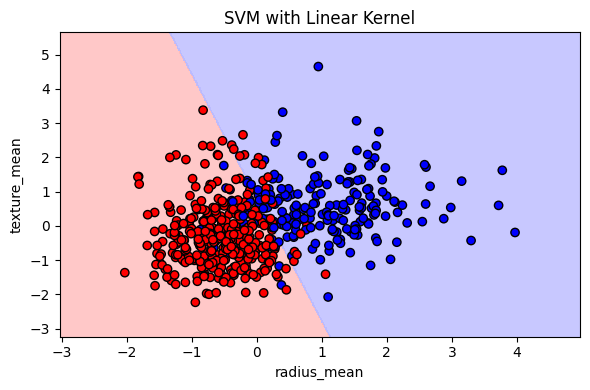

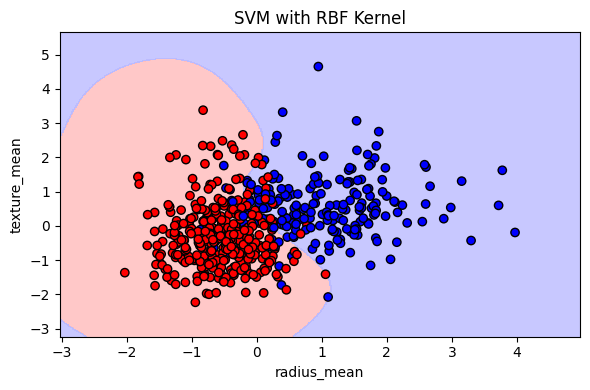

In [10]:
plot_decision_boundary(svm_linear, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, "SVM with RBF Kernel")

In [11]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [12]:
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Best Parameters:", grid.best_params_)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Best Parameters: {'C': 10, 'gamma': 0.1}


In [13]:
cv_score = cross_val_score(best_svm, X_scaled, y, cv=5).mean()
cv_score

np.float64(0.8963204471355379)